In [ ]:
import pandas as pd
import numpy as np

# Î∞©Î¨∏ Ï†ïÎ≥¥
df_place = pd.read_csv('./data/training/csv/tn_visit_area_info_Î∞©Î¨∏ÏßÄÏ†ïÎ≥¥_A.csv')
df_place.head(5)

# Ïó¨Ìñâ Ï†ïÎ≥¥
df_travel = pd.read_csv('./data/training/csv/tn_travel_Ïó¨Ìñâ_A.csv')
df_travel.head(5)

# Ïó¨ÌñâÍ∞ù Ï†ïÎ≥¥
df_traveler = pd.read_csv('./data/training/csv/tn_traveller_master_Ïó¨ÌñâÍ∞ù Master_A.csv')
df_traveler.head(5)

df = pd.merge(df_place, df_travel, on='TRAVEL_ID', how='left') # on TRAVEL_ID Ï£ºÏùò
df = pd.merge(df, df_traveler, on='TRAVELER_ID', how='left') # on TRAVELER_ID Ï£ºÏùò

df.head(5)

df.info()

# 'TRAVEL_MISSION_CHECK' Ïª¨ÎüºÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏïÑÎãå ÌñâÎßå ÌïÑÌÑ∞ÎßÅ
df_filter = df[~df['TRAVEL_MISSION_CHECK'].isnull()].copy()

# TRAVEL_MISSION_CHECK Ïª¨ÎüºÏóêÏÑú ';'Î°ú Íµ¨Î∂ÑÎêú Ï≤´ Î≤àÏß∏ Í∞íÏùÑ Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏÉàÎ°úÏö¥ Ïª¨Îüº ÏÉùÏÑ±
df_filter.loc[:, 'TRAVEL_MISSION_INT'] = df_filter['TRAVEL_MISSION_CHECK'].str.split(';').str[0].astype(int)

# VISIT_AREA_NMÏù¥ 'Ïßë'Ïù∏ Ìñâ Ï†úÍ±∞
df = df[df['VISIT_AREA_NM'] != 'Ïßë']

# VISIT_AREA_NMÏù¥ 'ÏπúÍµ¨/ÏπúÏßÄÏßë'Ïù∏ Ìñâ Ï†úÍ±∞
df = df[df['VISIT_AREA_NM'] != 'ÏπúÍµ¨/ÏπúÏßÄÏßë']

# VISIT_AREA_NMÏù¥ 'ÏàôÏÜå'Ïù∏ Ìñâ Ï†úÍ±∞
df = df[df['VISIT_AREA_NM'] != 'ÏàôÏÜå']

# Í≥µÎ∞±Î¨∏Ïûê("") Î•º NaN ÏúºÎ°ú ÏπòÌôò
#df = df.replace(r'^\s*$', np.nan, regex=True)

# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ Ï†úÍ±∞
#df = df.dropna()

df_filter

df.to_csv('./merged_data.csv', index=False, encoding='utf-8-sig')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30154 entries, 0 to 30153
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   VISIT_AREA_ID              30154 non-null  int64  
 1   TRAVEL_ID                  30154 non-null  object 
 2   VISIT_ORDER                30154 non-null  int64  
 3   VISIT_AREA_NM              30154 non-null  object 
 4   VISIT_START_YMD            30154 non-null  object 
 5   VISIT_END_YMD              30154 non-null  object 
 6   ROAD_NM_ADDR               20381 non-null  object 
 7   LOTNO_ADDR                 21859 non-null  object 
 8   X_COORD                    22821 non-null  float64
 9   Y_COORD                    22821 non-null  float64
 10  ROAD_NM_CD                 24 non-null     float64
 11  LOTNO_CD                   2433 non-null   object 
 12  POI_ID                     13872 non-null  object 
 13  POI_NM                     13872 non-null  obj

In [16]:
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df_place = pd.read_csv('./test.csv')

# Î∂ÑÏÑùÌï† ÌïµÏã¨ Ïª¨Îüº
core_columns = [
    'VISIT_AREA_NM', 'ROAD_NM_ADDR', 'GENDER', 'TRAVEL_STATUS_ACCOMPANY'
]

# Í≥µÎ∞±ÏùÑ NaNÏúºÎ°ú ÏπòÌôò
for col in core_columns:
    df_place[col] = df_place[col].replace(r'^\s*$', np.nan, regex=True)

# VISIT_AREA_NM Ïù¥ 'Ïßë' Ï†úÍ±∞
df_place = df_place[df_place['VISIT_AREA_NM'] != 'Ïßë']

# ÌïµÏã¨ Ïª¨ÎüºÎßå Í≤∞Ï∏°Í∞í Ï†úÍ±∞
df_place = df_place.dropna(subset=core_columns)

# Unnamed Ïª¨Îüº Ï†úÍ±∞ (ÏóëÏÖÄ Î∂àÎü¨Ïò¨ Îïå Ï¢ÖÏ¢Ö ÏÉùÍπÄ)
df_place = df_place.loc[:, ~df_place.columns.str.contains('^Unnamed')]

# Ï†ÄÏû•
df_place.to_csv('./test2.csv', index=False, encoding='utf-8-sig')

print(df_place)


       TRAVEL_ID  VISIT_AREA_NM         ROAD_NM_ADDR GENDER  AGE_GRP  \
0      a_a015688         ÌîÑÎ°úÎ∞©Ïä§ÎßàÏùÑ   Í≤ΩÍ∏∞ ÌååÏ£ºÏãú ÌÉÑÌòÑÎ©¥ ÏÉàÏò§Î¶¨Î°ú 77      ÎÇ®     30.0   
1      a_a004293        Î≥ëÏ†êÏó≠ 1Ìò∏ÏÑ†       Í≤ΩÍ∏∞ ÌôîÏÑ±Ïãú Îñ°Ï†ÑÍ≥®Î°ú 97      Ïó¨     40.0   
2      a_a000491          ÎçîÌòÑÎåÄÏÑúÏö∏     ÏÑúÏö∏ ÏòÅÎì±Ìè¨Íµ¨ Ïó¨ÏùòÎåÄÎ°ú 108      Ïó¨     30.0   
3      a_a000172         Í∞ïÎ¶âÏ§ëÏïôÏãúÏû•        Í∞ïÏõê Í∞ïÎ¶âÏãú Í∏àÏÑ±Î°ú 21      ÎÇ®     30.0   
5      a_a005474        ÏÉàÏ†àÏó≠ 6Ìò∏ÏÑ†    ÏÑúÏö∏ ÏùÄÌèâÍµ¨ Ï¶ùÏÇ∞Î°ú ÏßÄÌïò 400      ÎÇ®     40.0   
...          ...            ...                  ...    ...      ...   
24462  c_c005343       ÌïúÎ≥µÎÇ® Í≤ΩÎ≥µÍ∂ÅÏ†ê     ÏÑúÏö∏ Ï¢ÖÎ°úÍµ¨ ÏÇ¨ÏßÅÎ°ú 133-5      Ïó¨     20.0   
24466  a_a001505         Ïπ¥ÌéòÏïÑÏÅ†Î§ºÏä§  Í≤ΩÍ∏∞ Í∞ÄÌèâÍµ∞ Ï≤≠ÌèâÎ©¥ Ïã†Ï≤≠ÌèâÎ°ú 107      Ïó¨     30.0   
24467  a_a013660        Íµ≠Î¶ΩÏ§ëÏïôÎ∞ïÎ¨ºÍ¥Ä      ÏÑúÏö∏ Ïö©ÏÇ∞Íµ¨ ÏÑúÎπôÍ≥†Î°ú 137      ÎÇ®     20.0   
24468  a_a0000

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/merged_travel_jeju_data.csv', encoding='utf-8')

# Î∞©Î¨∏ÏßÄÎ≥Ñ Ïó¨ÌñâÏûê Ïàò ÏßëÍ≥Ñ
visit_counts = df['VISIT_AREA_NM'].value_counts()
print(visit_counts.head(10))

VISIT_AREA_NM
Ïßë              4485
Ï†úÏ£º Íµ≠Ï†úÍ≥µÌï≠        2204
ÍπÄÌè¨Íµ≠Ï†úÍ≥µÌï≠ Íµ≠ÎÇ¥ÏÑ†      958
Ï†úÏ£ºÎèôÎ¨∏ÏãúÏû•          655
ÏÑúÍ∑ÄÌè¨ Îß§Ïùº Ïò¨Î†àÏãúÏû•     572
Ìï®ÎçïÌï¥ÏàòÏöïÏû•          412
ÌòëÏû¨Ìï¥ÏàòÏöïÏû•          323
Ïò§ÏÑ§Î°ù Ìã∞ ÎÆ§ÏßÄÏóÑ       307
ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â           236
Ï≤≠Ï£ºÍµ≠Ï†úÍ≥µÌï≠          212
Name: count, dtype: int64


In [2]:
# ÏÑ±Î≥Ñ/Ïó∞Î†πÎåÄÎ≥Ñ ÌôúÎèô Ïú†Ìòï Î∂ÑÌè¨
activity_by_gender_age = df.groupby(['GENDER', 'AGE_GRP', 'ACTIVITY_TYPE_CD']).size().reset_index(name='count')
print(activity_by_gender_age)

   GENDER  AGE_GRP  ACTIVITY_TYPE_CD  count
0       ÎÇ®       20               1.0   2000
1       ÎÇ®       20               2.0    800
2       ÎÇ®       20               3.0    565
3       ÎÇ®       20               4.0   1044
4       ÎÇ®       20               5.0   1145
..    ...      ...               ...    ...
74      Ïó¨       60               3.0     91
75      Ïó¨       60               4.0    146
76      Ïó¨       60               5.0    138
77      Ïó¨       60               6.0     17
78      Ïó¨       60               7.0     46

[79 rows x 4 columns]


In [3]:
# Ïó¨Ìñâ Ïä§ÌÉÄÏùº ÌèâÍ∑†ÏùÑ Î∞©Î¨∏ÏßÄÎ≥ÑÎ°ú ÏßëÍ≥Ñ
style_cols = [f'TRAVEL_STYL_{i}' for i in range(1,9)]
style_means = df.groupby('VISIT_AREA_NM')[style_cols].mean()
print(style_means)

                      TRAVEL_STYL_1  TRAVEL_STYL_2  TRAVEL_STYL_3  \
VISIT_AREA_NM                                                       
(Ïû¨Îã®) Ïù∏Ï≤ú ÍµêÍµ¨ Ï≤úÏ£ºÍµêÌöå Ïú†ÏßÄÏû¨Îã®       1.000000       6.000000       1.000000   
(Ï£º) Ï†úÏ£ºÎäî Îûë Ï†úÏ£ºÍ≥†Ïî®ÎÑ§            2.000000       1.000000       4.000000   
0415Ïπ¥Ìéò                     3.500000       3.500000       1.500000   
1004ÎÆ§ÏßÄÏóÑÌååÌÅ¨                  3.333333       2.666667       2.666667   
10Ï†ÑÎπÑ                       4.000000       2.000000       2.000000   
...                             ...            ...            ...   
ÌûêÌäº Í∞ÄÎì†Ïù∏ ÏÑúÏö∏ Í∞ïÎÇ®Ï†ê Ï°∞Ïãù Î∑îÌéò        1.000000       1.000000       1.000000   
ÌûêÌïòÏö∞Ïä§ÌéúÏÖò                     2.000000       1.000000       1.000000   
ÌûòÏÑº Ïû•Ïñ¥                      5.000000       2.000000       3.000000   
ÌûòÏ∞¨ ÏïΩÍµ≠                      2.000000       6.000000       5.000000   
ÌûôÌïúÏãù                        4.000000       2.

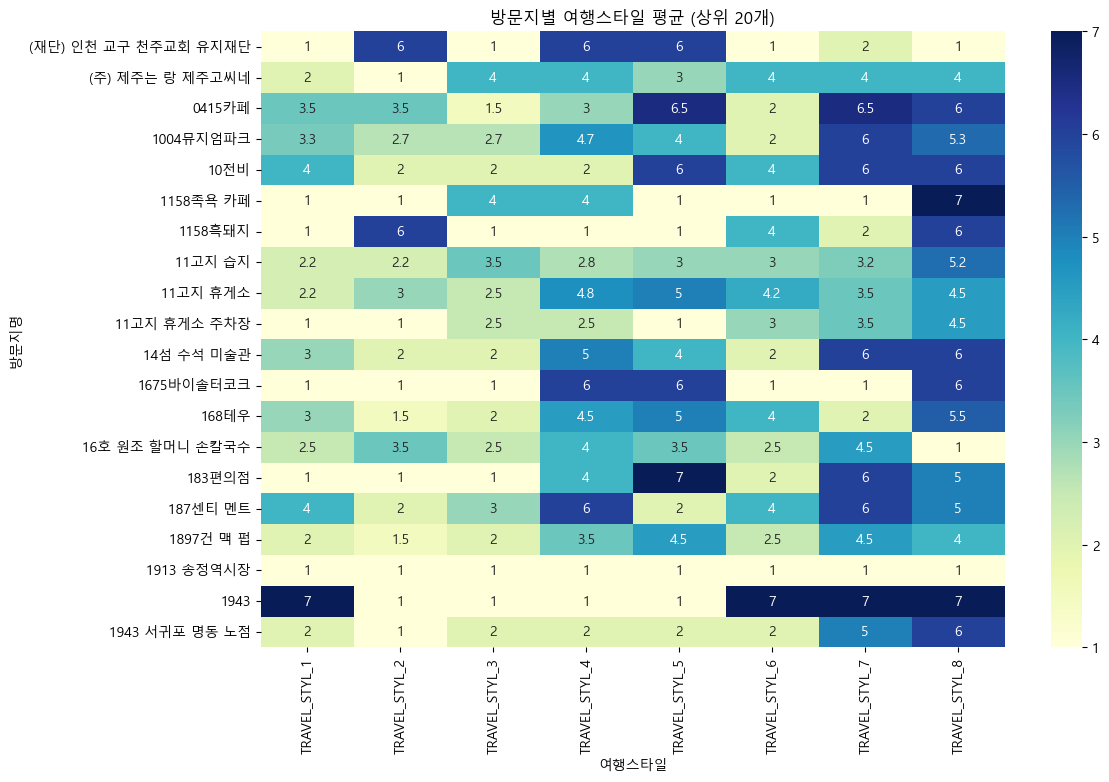

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Í¥ÄÍ¥ëÏßÄ/ÏùåÏãùÏ†ê/ÏàôÎ∞ïÏßÄÎßàÎã§ Ïó¨ÌñâÏä§ÌÉÄÏùºÏù¥ Îã§Î•º Í≤ÉÏù¥Îã§

# style_means: VISIT_AREA_NM ÏùÑ indexÎ°ú, travel_style_1~8 Ïª¨ÎüºÏù¥ ÌèâÍ∑†
style_means = df.groupby('VISIT_AREA_NM')[
    [f'TRAVEL_STYL_{i}' for i in range(1,9)]
].mean()

# ÎÑàÎ¨¥ ÎßéÏúºÎ©¥ ÏÉÅÏúÑ 20Í∞úÎßå
top_places = style_means.head(20)

plt.rcParams['font.family'] ='Malgun Gothic'
plt.figure(figsize=(12, 8))
sns.heatmap(top_places, annot=True, cmap='YlGnBu')
plt.title("Î∞©Î¨∏ÏßÄÎ≥Ñ Ïó¨ÌñâÏä§ÌÉÄÏùº ÌèâÍ∑† (ÏÉÅÏúÑ 20Í∞ú)")
plt.xlabel("Ïó¨ÌñâÏä§ÌÉÄÏùº")
plt.ylabel("Î∞©Î¨∏ÏßÄÎ™Ö")
plt.show()

In [11]:
import pandas as pd

df = pd.read_csv('./data/merged_travel_jeju_data.csv', encoding='utf-8')

# AGE_GRPÍ∞Ä Ïà´ÏûêÌòïÏù¥ÎùºÎ©¥ Î¨∏ÏûêÏó¥ '20ÎåÄ', '30ÎåÄ' Îì±ÏúºÎ°ú Î≥ÄÌôò (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
df['AGE_GRP'] = df['AGE_GRP'].astype(str) + 'ÎåÄ'

# Î∞©Î¨∏ÏßÄÎ≥Ñ, ÎÇòÏù¥ÎåÄÎ≥Ñ, ÏÑ±Î≥ÑÎ≥Ñ Ïó¨ÌñâÏûê Ïàò ÏßëÍ≥Ñ
grouped = df.groupby(['VISIT_AREA_NM', 'AGE_GRP', 'GENDER']).size().reset_index(name='COUNT')

print(grouped.head(10))


          VISIT_AREA_NM AGE_GRP GENDER  COUNT
0  (Ïû¨Îã®) Ïù∏Ï≤ú ÍµêÍµ¨ Ï≤úÏ£ºÍµêÌöå Ïú†ÏßÄÏû¨Îã®     50ÎåÄ      ÎÇ®      1
1       (Ï£º) Ï†úÏ£ºÎäî Îûë Ï†úÏ£ºÍ≥†Ïî®ÎÑ§     30ÎåÄ      ÎÇ®      1
2                0415Ïπ¥Ìéò     20ÎåÄ      Ïó¨      1
3                0415Ïπ¥Ìéò     40ÎåÄ      Ïó¨      1
4             1004ÎÆ§ÏßÄÏóÑÌååÌÅ¨     40ÎåÄ      Ïó¨      6
5                  10Ï†ÑÎπÑ     30ÎåÄ      Ïó¨      1
6             1158Ï°±Ïöï Ïπ¥Ìéò     30ÎåÄ      Ïó¨      1
7               1158ÌùëÎèºÏßÄ     40ÎåÄ      Ïó¨      1
8               11Í≥†ÏßÄ ÏäµÏßÄ     20ÎåÄ      Ïó¨      1
9               11Í≥†ÏßÄ ÏäµÏßÄ     30ÎåÄ      Ïó¨      1


In [13]:
# Î∞©Î¨∏ÏßÄÎ≥Ñ Ï†ÑÏ≤¥ Ïó¨ÌñâÏûê Ïàò ÏßëÍ≥Ñ ÌõÑ ÏÉÅÏúÑ 5Í∞ú ÏÑ†Ï†ï
top_places = df['VISIT_AREA_NM'].value_counts().head(5).index.tolist()

# ÏÉÅÏúÑ Î∞©Î¨∏ÏßÄÎßå ÌïÑÌÑ∞ÎßÅ
filtered = grouped[grouped['VISIT_AREA_NM'].isin(top_places)]

# ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ± : index=VISIT_AREA_NM, columns=(AGE_GRP, GENDER), values=COUNT
pivot_df = filtered.pivot_table(index='VISIT_AREA_NM',
                                columns=['AGE_GRP', 'GENDER'],
                                values='COUNT',
                                fill_value=0)

print(pivot_df)


AGE_GRP          20ÎåÄ           30ÎåÄ           40ÎåÄ           50ÎåÄ          60ÎåÄ  \
GENDER             ÎÇ®      Ïó¨      ÎÇ®      Ïó¨      ÎÇ®      Ïó¨      ÎÇ®      Ïó¨     ÎÇ®   
VISIT_AREA_NM                                                                 
ÍπÄÌè¨Íµ≠Ï†úÍ≥µÌï≠ Íµ≠ÎÇ¥ÏÑ†     145.0  265.0  149.0  191.0   38.0   86.0   36.0   37.0   6.0   
ÏÑúÍ∑ÄÌè¨ Îß§Ïùº Ïò¨Î†àÏãúÏû•     71.0  145.0   88.0  113.0   32.0   51.0   18.0   49.0   1.0   
Ï†úÏ£º Íµ≠Ï†úÍ≥µÌï≠        305.0  596.0  316.0  448.0  100.0  223.0   72.0  123.0   3.0   
Ï†úÏ£ºÎèôÎ¨∏ÏãúÏû•          99.0  243.0   73.0  174.0   18.0   15.0    8.0   22.0   0.0   
Ïßë              499.0  897.0  560.0  902.0  344.0  577.0  265.0  351.0  34.0   

AGE_GRP              
GENDER            Ïó¨  
VISIT_AREA_NM        
ÍπÄÌè¨Íµ≠Ï†úÍ≥µÌï≠ Íµ≠ÎÇ¥ÏÑ†      5.0  
ÏÑúÍ∑ÄÌè¨ Îß§Ïùº Ïò¨Î†àÏãúÏû•     4.0  
Ï†úÏ£º Íµ≠Ï†úÍ≥µÌï≠        18.0  
Ï†úÏ£ºÎèôÎ¨∏ÏãúÏû•          3.0  
Ïßë              56.0  


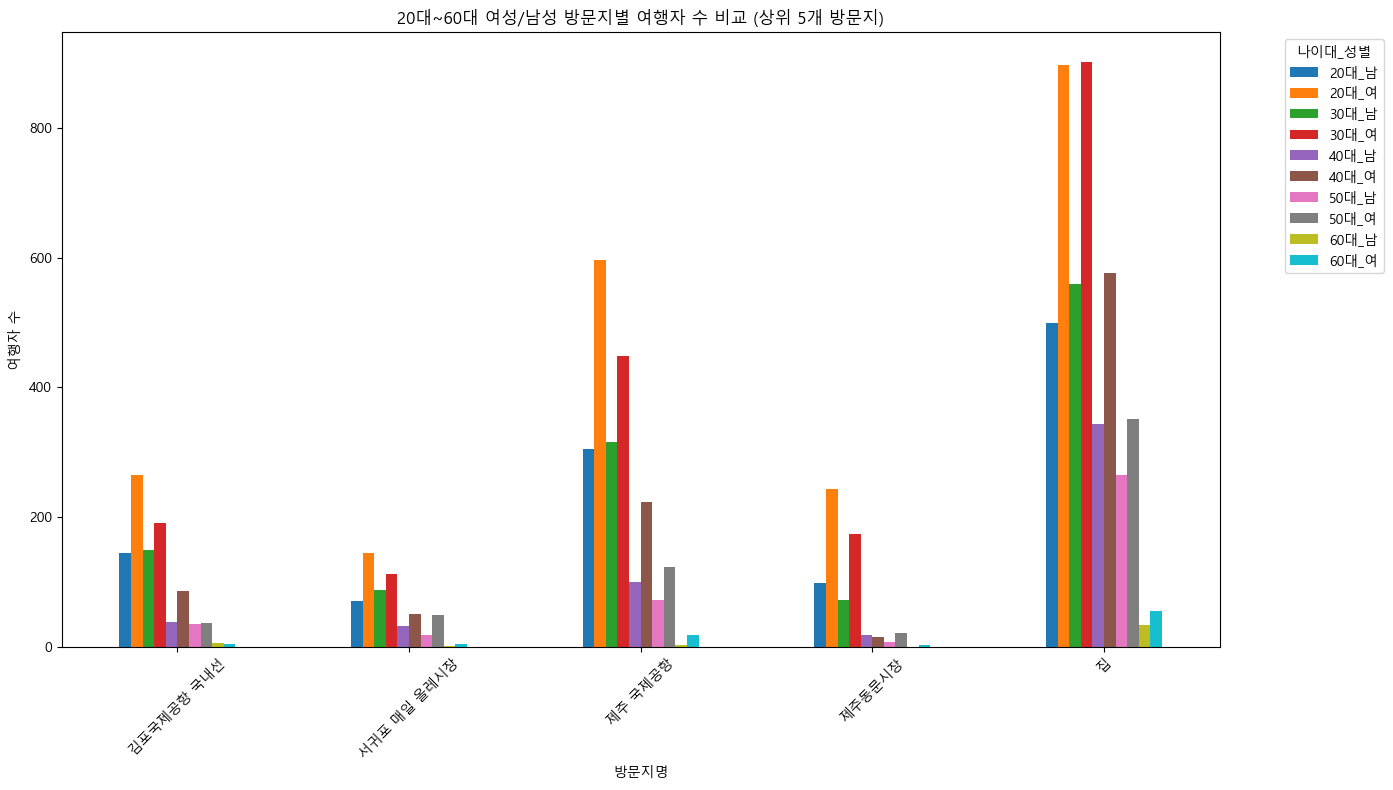

In [14]:
import matplotlib.pyplot as plt

# Ïª¨Îüº Îã§Ï§ë Ïù∏Îç±Ïä§ ÌíÄÍ∏∞
pivot_df.columns = ['_'.join(col) for col in pivot_df.columns]

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
pivot_df.plot(kind='bar', figsize=(14, 8))

plt.title('20ÎåÄ~60ÎåÄ Ïó¨ÏÑ±/ÎÇ®ÏÑ± Î∞©Î¨∏ÏßÄÎ≥Ñ Ïó¨ÌñâÏûê Ïàò ÎπÑÍµê (ÏÉÅÏúÑ 5Í∞ú Î∞©Î¨∏ÏßÄ)')
plt.ylabel('Ïó¨ÌñâÏûê Ïàò')
plt.xlabel('Î∞©Î¨∏ÏßÄÎ™Ö')
plt.xticks(rotation=45)
plt.legend(title='ÎÇòÏù¥ÎåÄ_ÏÑ±Î≥Ñ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
import matplotlib.pyplot as plt

# Ïª¨Îüº Îã§Ï§ë Ïù∏Îç±Ïä§ ÌíÄÍ∏∞
pivot_df.columns = ['_'.join(col) for col in pivot_df.columns]

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
pivot_df = grouped.pivot_table(index='VISIT_AREA_NM',
                               columns=['AGE_GRP', 'GENDER'],
                               values='COUNT',
                               fill_value=0)

pivot_df.columns = ['_'.join(col) for col in pivot_df.columns]
pivot_df.plot(kind='bar', figsize=(20, 10))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÌÇ§ÏõåÏÑú Í∞ÄÎèÖÏÑ± Ìñ•ÏÉÅ Í∂åÏû•

plt.title('20ÎåÄ~60ÎåÄ Ïó¨ÏÑ±/ÎÇ®ÏÑ± Î∞©Î¨∏ÏßÄÎ≥Ñ Ïó¨ÌñâÏûê Ïàò ÎπÑÍµê (Î™®Îì† Î∞©Î¨∏ÏßÄ)')
plt.ylabel('Ïó¨ÌñâÏûê Ïàò')
plt.xlabel('Î∞©Î¨∏ÏßÄÎ™Ö')
plt.xticks(rotation=90)  # Î∞©Î¨∏ÏßÄÎ™ÖÏù¥ ÎßéÏúºÎãà 90ÎèÑÎ°ú ÏÑ∏Ïö∞Í∏∞ Í∂åÏû•
plt.legend(title='ÎÇòÏù¥ÎåÄ_ÏÑ±Î≥Ñ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Unexpected exception formatting exception. Falling back to standard exception
Error in callback <function _draw_all_if_interactive at 0x0000026580D9D550> (for post_execute), with arguments args (),kwargs {}:
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_8260\2567371018.py", line 13, in <module>
    pivot_df.plot(kind='bar', figsize=(20, 10))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÌÇ§ÏõåÏÑú Í∞ÄÎèÖÏÑ± Ìñ•ÏÉÅ Í∂åÏû•
  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_core.py", line 1030, in __call__
    return plot_backend.plot(data, kind=kind, **kwargs)
  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\__init__.py", line 71, in plot
    plot_obj.generate()
  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py", line 501, in generate
    self._make_plot(fig)
  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\

MemoryError: In RendererAgg: Out of memory

<Figure size 2000x1000 with 1 Axes>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report

# Ïπ¥ÌÖåÍ≥†Î¶¨ Ïù∏ÏΩîÎî©
df['GENDER_enc'] = LabelEncoder().fit_transform(df['GENDER'])
df['AGE_GRP_enc'] = LabelEncoder().fit_transform(df['AGE_GRP'])
df['VISIT_AREA_enc'] = LabelEncoder().fit_transform(df['VISIT_AREA_NM'])

features = ['GENDER_enc', 'AGE_GRP_enc'] + [f'TRAVEL_STYL_{i}' for i in range(1,9)]
X = df[features]
y = df['VISIT_AREA_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

MemoryError: Unable to allocate 1.17 GiB for an array with shape (12003, 1, 13028) and data type float64

In [6]:
import pandas as pd
from joblib import load

# 1. Î™®Îç∏ & LabelEncoder Î∂àÎü¨Ïò§Í∏∞
loaded_model = load("./resources/travel_rf_model.joblib")
le = load("./resources/travel_label_encoder.joblib")

# 2. ÏÇ¨Ïö©Ïûê ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ (Ïòà: 20ÎåÄ ÎÇ®ÏÑ±, ÌôúÎèôÏΩîÎìú 3)
test_input = pd.DataFrame([{
    "GENDER": 1,
    "AGE_GRP": 20,
    "ACTIVITY_TYPE_CD": 3
}])

# 3. ÌôïÎ•† ÏòàÏ∏°
probas = loaded_model.predict_proba(test_input)[0]

# 4. ÏÉÅÏúÑ 10Í∞ú Ïù∏Îç±Ïä§ Ï∂îÏ∂ú
top10_indices = probas.argsort()[::-1][:10]

# 5. Ïù∏Îç±Ïä§Î•º Ïã§Ï†ú Ïó¨ÌñâÏßÄ Ïù¥Î¶ÑÏúºÎ°ú Î≥ÄÌôò
top10_places = le.inverse_transform(top10_indices)

# 6. Ï∂úÎ†•
print("üéØ Ï∂îÏ≤ú Ïó¨ÌñâÏßÄ TOP 10")
for rank, place in enumerate(top10_places, 1):
    print(f"{rank}. {place}")

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


üéØ Ï∂îÏ≤ú Ïó¨ÌñâÏßÄ TOP 10
1. ÎèôÍ∂ÅÍ≥º ÏõîÏßÄ
2. ÎåÄÎ¶âÏõê
3. ÏïÑÏø†ÏïÑÌîåÎùºÎÑ∑ Ïó¨Ïàò
4. Í≤ΩÍ∏∞Ï†Ñ
5. ÎπÑÎ∞ÄÏùò Ïà≤
6. 9.81ÌååÌÅ¨
7. Ï£ΩÎÖπÏõê
8. ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â
9. Ï≤úÏßÄÏó∞Ìè≠Ìè¨
10. Ï∫êÎ¶¨ÎπÑÏïàÎ≤†Ïù¥


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
